### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "/Users/raghavatal/Developer/Data/Petfinder_DataMiningProject/petfinder-adoption-prediction"
!ls $data_path

breed_labels.csv test             test_sentiment   train_metadata
color_labels.csv test_images      train.csv        train_sentiment
state_labels.csv test_metadata    train_images


### Reading train.csv

In [3]:
train_df = pd.read_csv(data_path+'/train.csv')
train_df.shape

(14993, 24)

In [4]:
#showing two rows from the train.csv
pd.set_option('display.max_columns', 500)
train_df.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

### Observation 1

Train.csv has two columns (Name and Description) which have missing values. What can we do to fill in the blanks. 

Q - Can we drop the name column? can a certain name impacts the speed of adoption?

Q - Can we fill in the name column with the most common dog name?

Q - How do we fill the missing descriptions?

### Finding out unique dog names and their count to get the most used dog name

#### Top 10 most used Dog Names

In [6]:
dog_names = train_df['Name']

dog_names.value_counts().head(10)

Baby       66
Lucky      64
No Name    54
Brownie    54
Mimi       52
Blackie    49
Puppy      45
Kittens    39
Max        39
Kitty      39
Name: Name, dtype: int64

#### Finding out the names of top 10 adopted dogs

In [7]:
dog_names = train_df.loc[train_df['AdoptionSpeed'] !=0,'Name']
dog_names.value_counts().head(10)

Baby       64
Lucky      59
Brownie    53
No Name    51
Mimi       49
Blackie    48
Puppy      44
Max        39
Kittens    39
Kitty      38
Name: Name, dtype: int64

#### Q - There is also a value as "No Name" in the data. Shall we put this in the missing values?

### Analysis of Adoption Speed variable

#### Showing count plot of the Adoption Speed in Training Data

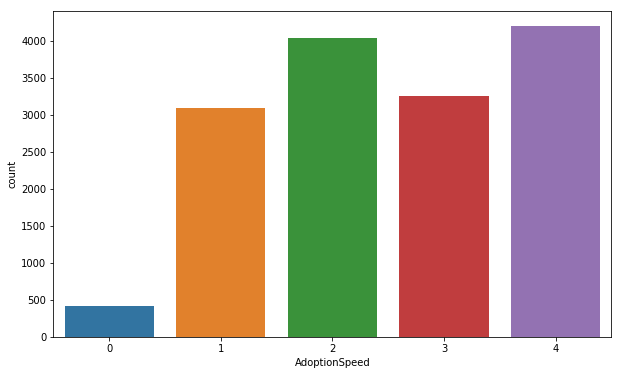

In [8]:
adoption_speed = train_df['AdoptionSpeed']
plt.figure(figsize=(10,6))
sns.countplot(adoption_speed);

#### Calculating the percentage for each adoption speed in Training data

In [11]:
as_descrp_dict = {0:'Adopted on the same day as it was listed.', 
                1:'Adopted between 1 and 7 days (1st week) after being listed.' ,
                2:'Adopted between 8 and 30 days (1st month) after being listed.',
                3:'Adopted between 31 and 90 days (2nd & 3rd month) after being listed.',
                4:'No adoption after 100 days of listing. (No pets that waited between 90 and 100 days).'
                 }

In [12]:
def getValueCountsForFeature(df,col):
    value_counts = df[col].value_counts()
    return value_counts

def getPercentCountForFeatureValue(df,col):
    value_counts = getValueCountsForFeature(df,col)
    total = np.sum(value_counts)
    result = (value_counts*100)/total
    return result

In [13]:
result = getPercentCountForFeatureValue(train_df,'AdoptionSpeed')
for idx in result.index:
    print('{}% pets got {} '.format(np.round(result[idx],2), as_descrp_dict[idx]))

27.99% pets got No adoption after 100 days of listing. (No pets that waited between 90 and 100 days). 
26.93% pets got Adopted between 8 and 30 days (1st month) after being listed. 
21.74% pets got Adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
20.61% pets got Adopted between 1 and 7 days (1st week) after being listed. 
2.73% pets got Adopted on the same day as it was listed. 


#### Pie Chart of Adoption Speed in Training data

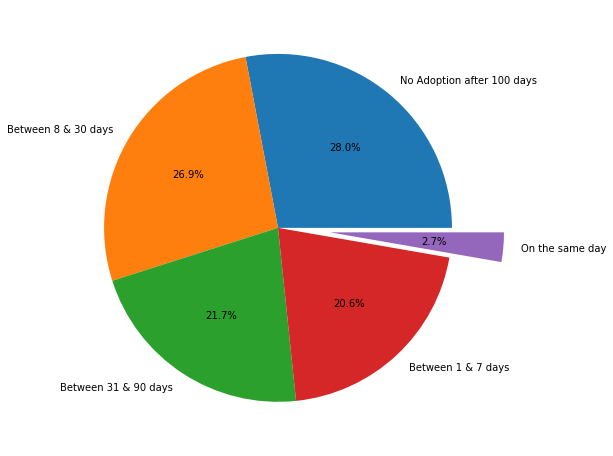

In [39]:
value_counts = getPercentCountForFeatureValue(train_df,'AdoptionSpeed')
labels=['No Adoption after 100 days','Between 8 & 30 days','Between 31 & 90 days','Between 1 & 7 days','On the same day']
plt.figure(figsize=(8,8))
plt.pie(value_counts,explode=[0.0]*4 + [0.3],labels=labels,autopct='%1.1f%%');

### Analyzing Features of pets adopted with speed 0 (highest speed)

In [165]:
pets_as_zero = train_df.loc[train_df['AdoptionSpeed']==0,:]
pets_as_zero.shape

(410, 24)

#### Type

In [166]:
type_desc_dict = {1:'Dog',2:'Cat'}
pets_as_zero['Type'] = pets_as_zero['Type'].map(type_desc_dict)

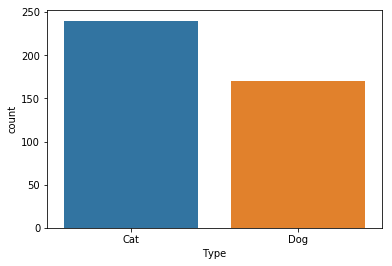

In [167]:
sns.countplot(pets_as_zero['Type']);

#### Age

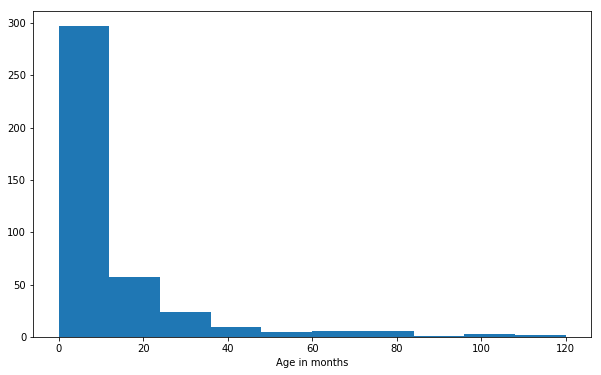

In [168]:
plt.figure(figsize=(10,6))
plt.hist(pets_as_zero['Age']);
plt.xlabel('Age in months');

#### Gender

In [169]:
gender_desc_dict = {1:'Male',2:'Female',3:'Mixed'}
pets_as_zero['Gender'] = pets_as_zero['Gender'].map(gender_desc_dict)

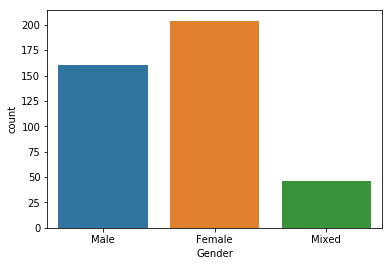

In [170]:
sns.countplot(pets_as_zero['Gender']);

#### Color

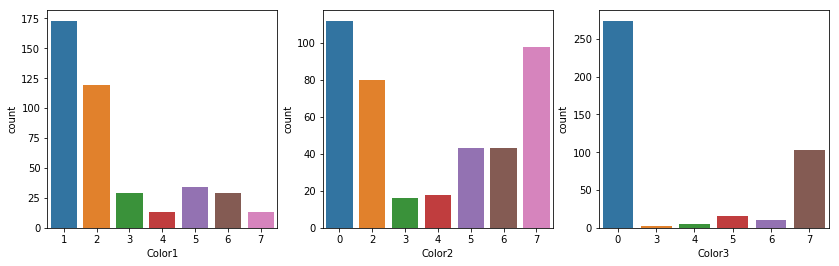

In [171]:
fig,axs = plt.subplots(figsize=(14,4), nrows=1,ncols=3)

sns.countplot(pets_as_zero['Color1'],ax=axs[0]);
sns.countplot(pets_as_zero['Color2'],ax=axs[1]);
sns.countplot(pets_as_zero['Color3'],ax=axs[2]);

#### MaturitySize

In [172]:
maturitySize_desc_dict = {0:'Not Specified',1:'Small',2:'Medium',3:'Large',4:'Extra Large'}
pets_as_zero['MaturitySize'] = pets_as_zero['MaturitySize'].map(maturitySize_desc_dict)

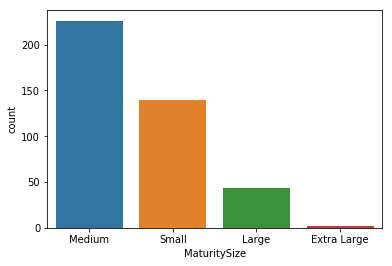

In [173]:
sns.countplot(pets_as_zero['MaturitySize']);

#### FurLength

In [174]:
furLength_desc_dict = {0:'Not Specified',1:'Short',2:'Medium',3:'Long'}
pets_as_zero['FurLength'] = pets_as_zero['FurLength'].map(furLength_desc_dict)

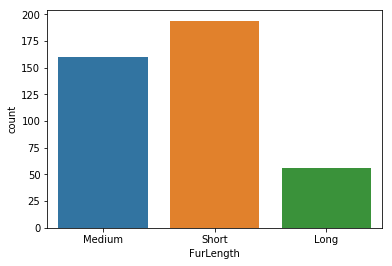

In [175]:
sns.countplot(pets_as_zero['FurLength']);

#### Breed

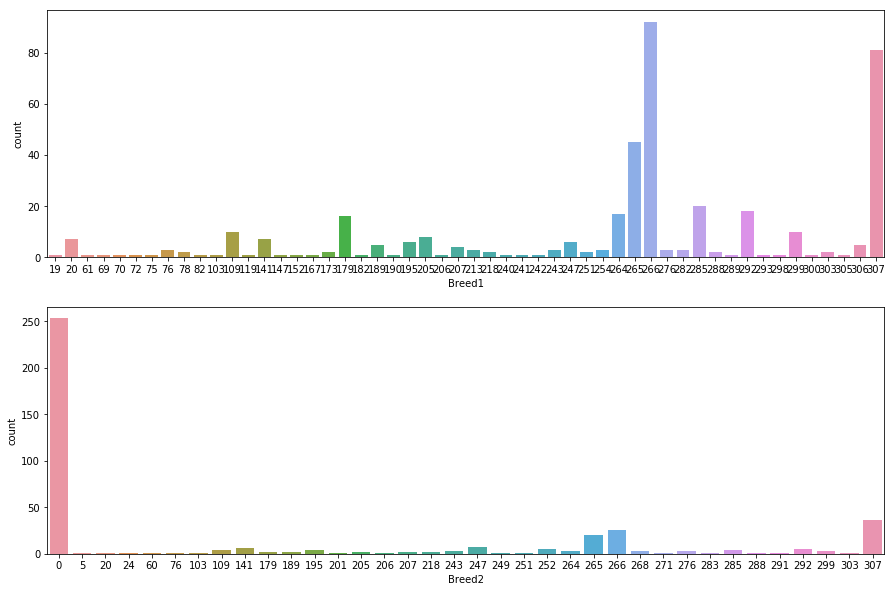

In [176]:
fig,axs = plt.subplots(figsize=(15,10), nrows=2,ncols=1)

sns.countplot(pets_as_zero['Breed1'],ax=axs[0]);
sns.countplot(pets_as_zero['Breed2'],ax=axs[1]);

#### Vaccinated

In [177]:
Vaccinated_desc_dict = {1:'Yes',2:'No',3:'Not Sure'}
pets_as_zero['Vaccinated'] = pets_as_zero['Vaccinated'].map(Vaccinated_desc_dict)

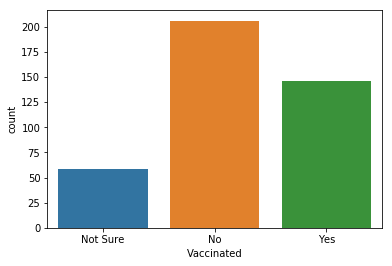

In [178]:
sns.countplot(pets_as_zero['Vaccinated']);

#### Dewormed

In [179]:
dewormed_desc_dict = {1:'Yes',2:'No',3:'Not Sure'}
pets_as_zero['Dewormed'] = pets_as_zero['Dewormed'].map(dewormed_desc_dict)

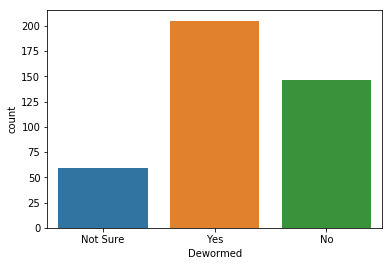

In [180]:
sns.countplot(pets_as_zero['Dewormed']);

#### Sterilized

In [181]:
sterlized_desc_dict = {1:'Yes',2:'No',3:'Not Sure'}
pets_as_zero['Sterilized'] = pets_as_zero['Sterilized'].map(sterlized_desc_dict)

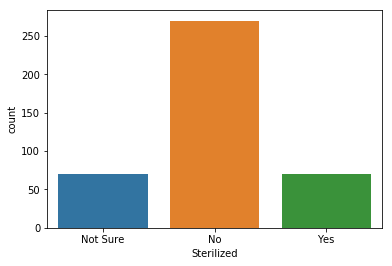

In [182]:
sns.countplot(pets_as_zero['Sterilized']);

#### Health

In [183]:
health_desc_dict = {0:'Not Specified',1:'Healthy',2:'Minor Injury',3:'Serious Injury'}
pets_as_zero['Health'] = pets_as_zero['Health'].map(health_desc_dict)

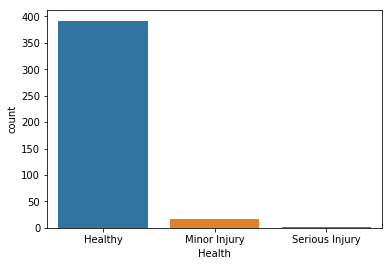

In [184]:
sns.countplot(pets_as_zero['Health']);

### Observation 2

There are listing containing groups of pets hence there are 3 genders. Gender = 3 means the listing was for group of pets

### Effect of Fees on Adoption Speed

In [226]:
pets_as_zero['Fee'].value_counts()

0       357
100       9
50        8
150       5
500       4
200       4
350       2
1         2
10        2
25        2
30        2
400       2
250       2
300       2
70        1
1000      1
35        1
120       1
160       1
8         1
80        1
Name: Fee, dtype: int64

In [207]:
fee = train_df['Fee'].values
from sklearn.preprocessing import Normalizer
fee = Normalizer().fit_transform(fee[:,np.newaxis])
fee.shape

(14993, 1)

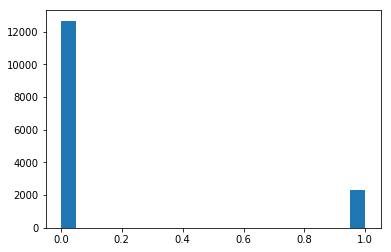

In [208]:
plt.hist(fee,bins=20);

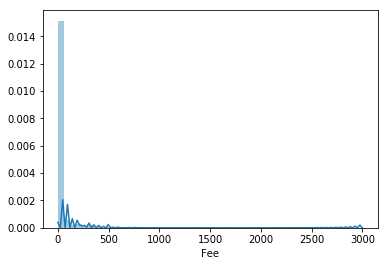

In [193]:
sns.distplot(train_df['Fee'])

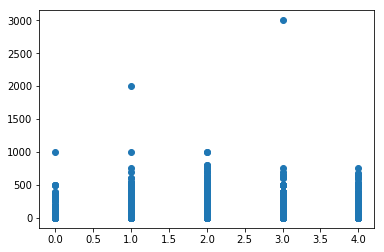

In [190]:
plt.scatter(train_df['AdoptionSpeed'],train_df['Fee'])

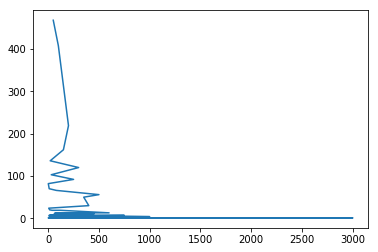

In [221]:
fee_val_counts = train_df['Fee'].value_counts()
fee_val_counts = fee_val_counts[1:]
plt.plot(fee_val_counts)

(array([1.4673e+04, 2.9500e+02, 1.9000e+01, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.27113205,  3.55481625,  7.38076455, 11.20671284, 15.03266114,
        18.85860944, 22.68455774, 26.51050603, 30.33645433, 34.16240263,
        37.98835093]),
 <a list of 10 Patch objects>)

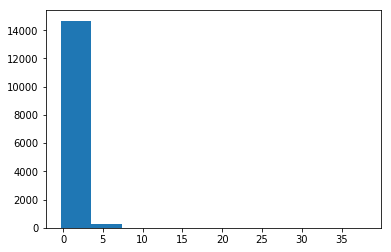

In [225]:
from sklearn.preprocessing import StandardScaler
fee = StandardScaler().fit_transform(train_df['Fee'][:,np.newaxis])
plt.hist(fee)

### Video Amount

In [228]:
train_df['VideoAmt'].value_counts()

0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64

In [230]:
train_df.loc[train_df['AdoptionSpeed']==0,'VideoAmt'].value_counts()

0    390
1     16
2      3
3      1
Name: VideoAmt, dtype: int64

### Photo Amount

In [232]:
train_df['PhotoAmt'].value_counts().head()

1.0    3075
2.0    2518
3.0    2511
5.0    2147
4.0    1881
Name: PhotoAmt, dtype: int64

In [233]:
train_df.loc[train_df['AdoptionSpeed']==0,'PhotoAmt'].value_counts()

2.0     83
1.0     75
3.0     75
5.0     65
4.0     45
0.0     24
6.0     15
8.0      6
7.0      6
10.0     4
15.0     2
9.0      2
19.0     2
11.0     2
12.0     2
27.0     1
13.0     1
Name: PhotoAmt, dtype: int64

### Description

In [239]:
train_df['Description'].str.len().sort_values(ascending=False)

481      6664.0
11843    5955.0
8019     5798.0
1839     5289.0
2033     4582.0
8538     4568.0
5277     4549.0
7482     4545.0
4998     4500.0
13523    4286.0
8693     4014.0
8829     3809.0
11214    3655.0
9895     3553.0
1241     3531.0
2920     3493.0
4562     3468.0
5815     3454.0
994      3453.0
13631    3395.0
10133    3360.0
7167     3331.0
14269    3248.0
7233     3134.0
9263     3125.0
396      3100.0
5902     3098.0
6760     3032.0
9931     2991.0
3287     2989.0
          ...  
14875       3.0
10099       3.0
1974        3.0
4337        2.0
13501       2.0
13280       2.0
10372       2.0
13288       1.0
10014       1.0
13386       1.0
1569        1.0
1601        1.0
1522        1.0
2514        1.0
5807        1.0
8342        1.0
10907       1.0
436         1.0
96          NaN
605         NaN
1098        NaN
2109        NaN
4218        NaN
4904        NaN
6041        NaN
8674        NaN
10272       NaN
11365       NaN
12713       NaN
14809       NaN
Name: Description, Lengt

In [244]:
train_df.iloc[96]

Type                                            2
Name                                        Manja
Age                                            19
Breed1                                        285
Breed2                                          0
Gender                                          2
Color1                                          1
Color2                                          6
Color3                                          0
MaturitySize                                    3
FurLength                                       3
Vaccinated                                      1
Dewormed                                        1
Sterilized                                      2
Health                                          1
Quantity                                        1
Fee                                             0
State                                       41401
RescuerID        12c51d7222986fbf000db9061f5082be
VideoAmt                                        0


In [246]:
train_df.loc[train_df['Description'].isnull(),:]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
96,2,Manja,19,285,0,2,1,6,0,3,3,1,1,2,1,1,0,41401,12c51d7222986fbf000db9061f5082be,0,NaN,5e4154870,3.0,1
605,2,Mickey,2,264,0,1,1,7,0,2,2,2,2,2,1,1,0,41401,bb7e38ebd628443cefb56024635dd647,0,NaN,56583003c,3.0,4
1098,2,Pucci,6,266,292,1,1,6,0,1,1,1,1,3,1,1,0,41326,90b00f90ffdf9ec1cac529a2bbef3ecc,0,NaN,8c4c4bc6e,1.0,4
2109,1,Chelsea And Sherbert,31,307,0,2,1,2,7,2,2,1,1,1,1,2,0,41401,c814d8b7928da23e3add9ec4d270de95,0,NaN,50eddd1bb,3.0,2
4218,2,Mog,84,266,0,1,3,0,0,3,1,1,1,1,1,1,0,41401,bc630ee7cec2fa789b0412ff798df83f,0,NaN,9d82e4438,5.0,2
4904,2,Brumby,2,299,0,1,1,7,0,2,1,2,1,2,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,ba16888d7,2.0,2
6041,2,Oshin & Lola,3,254,254,2,2,7,0,1,1,2,2,3,1,2,0,41326,6a33f105d818ce64de49a0b83a33b35a,0,NaN,4ec25bc3b,4.0,3
8674,2,KANTHAKA,2,299,0,2,1,7,0,2,1,2,1,2,1,1,0,41326,744fa4278196568a18fcf5cd7d324ed2,0,NaN,97f0a97ef,1.0,2
10272,1,Unknown,0,307,0,1,5,7,0,2,2,3,3,3,2,1,0,41326,f0997d267a9acadd44a5301a18f83df5,0,NaN,f67786a70,0.0,4
11365,2,J,25,292,292,1,2,0,0,3,1,1,1,1,1,1,0,41326,0bda3ae2e5c78a3b2ff9a725dbe42161,0,NaN,f775ef952,1.0,2


### Creating X_train and Y_train dataframes

In [186]:
X_train = train_df.loc[:,'Type':'PhotoAmt']
Y_train = train_df['AdoptionSpeed']
print("Shape of Training Features dataset: ", X_train.shape)
print("Shape of Training Response: ", Y_train.shape)

Shape of Training Features dataset:  (14993, 23)
Shape of Training Response:  (14993,)
